## <center> ACM India and RBCDSAI Joint Summer School on DS/AI/ML
### <center> Hands-on Tutorial Day-4
### <center> Regression

**Contents**  
1. Brief introduction to Machine learning  
2. Linear Regression - Normal equation  
3. Univariate linear regression  
4. Regularization - Ridge and LASSO
5. Polynomial regression  
6. Regression analysis using Boston dataset 

### Introduction to Machine learning

![MachineLearning.png](https://drive.google.com/uc?export=view&id=1WXJAn2YH5Bg9EHwiGHLeuJYENnZDOJZ7)

![MLapproach.png](https://drive.google.com/uc?export=view&id=1CBVp9USyjIFydGBFzYKVdTnAjlTFB5cq)

### Linear regression


#### Univariate linear regression 

In [ ]:
# Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from yellowbrick.regressor import ResidualsPlot

Linear regression analysis using simulated dataset

In [ ]:
# Creating a variable 
X = 2* np.random.rand(100,1)
y = 4 + 3 * X +np.random.randn(100,1)

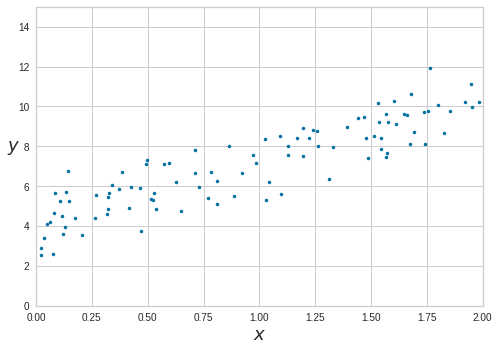

In [ ]:
# Plot the variable
plt.plot(X,y, 'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

##### Solving using normal equation method:
  In normal equation method, the minimization of the cost function, $\hat{\theta} = (X^{T}.X)^{-1}.X^{T}.y$ provide the results.  


In [ ]:
# Solving using Normal equation (Least square minimization)
X_b = np.c_[np.ones((100,1)),X]

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

#y_pred = X_b @ theta_best

array([[4.09507263],
       [3.1282162 ]])

In [ ]:
# Prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
y_new = 4 + 3 * X_new
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.09507263],
       [10.35150503]])

In [ ]:
# Mean squared error
mse = (1/len(X_new))*(np.sum((y_predict - y_new)**2))
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE:',rmse)

MSE: 0.06629729615855927
RMSE: 0.2574826133131308


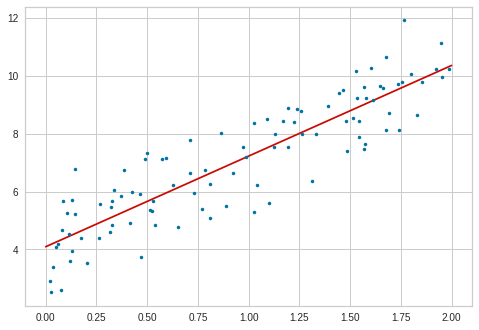

In [ ]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.show()

The computational complexity of estimating inverse of $X^{T}.X$ in normal equation is in the order of $\approx O(n^{3})$. The complexity increases and the speed decreases with the increase in number of features. So Gradient descent methods were employed for the linear regression problems.

##### Gradient Descent

In [ ]:
# Parameters
n_iter = 1000 
lrate = 0.01  # learning rate
theta = np.random.randn(2,1) # random initialization

In [ ]:
#Gradient descent
m = len(X_b) # number of training examples
# repeat until convergance
for i in range(n_iter):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - lrate * gradients

In [ ]:
print('Best theta computed from gradient descent: ')
print(f' {theta} ')

Best theta computed from gradient descent: 
 [[4.07315905]
 [3.01583622]] 


In [ ]:
# MSE calculation
y_predict = X_new_b @ theta

# Mean squared error
mse = (1/len(X_new))*(np.sum((y_predict - y_new)**2))
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE:',rmse)

MSE: 0.07123172160595043
RMSE: 0.26689271553556954


##### Sci-kit learn package

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Fitting a model to calculate the intercept and coefficient
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
lin_reg.intercept_,lin_reg.coef_

(array([4.09507263]), array([[3.1282162]]))

In [ ]:
# Predicting a new y-values with the identified parameters
X_new = np.array([[0],[2]])
y_predict = lin_reg.predict(X_new)
y_predict

array([[ 4.09507263],
       [10.35150503]])

In [ ]:
# Gradient descent 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=1)
sgd_reg.fit(X, y.ravel())

print('The intercept:',sgd_reg.intercept_,'The coefficient:',sgd_reg.coef_)

# Prediction
X_new = np.array([[0],[2]])
y_predict = sgd_reg.predict(X_new)
y_predict

The intercept: [4.1452754] The coefficient: [3.29800047]


array([ 4.1452754 , 10.74127633])

In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_error
y_new = 4 - 3*X_new
mse = mean_squared_error(y_new,y_predict)
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE:',rmse)

MSE: 81.18061376621982
RMSE: 9.010028510843894


##### Residual plots

In [ ]:
# Function for residual plot
def residplot(y_true,y_pred,x,weights):
    residuals = np.sqrt(weights)*np.array(y_true-y_pred)
    plt.figure()
    plt.scatter(x,residuals)
    plt.xlabel('x')
    plt.ylabel('Residuals')
    plt.ylim([-2,2])

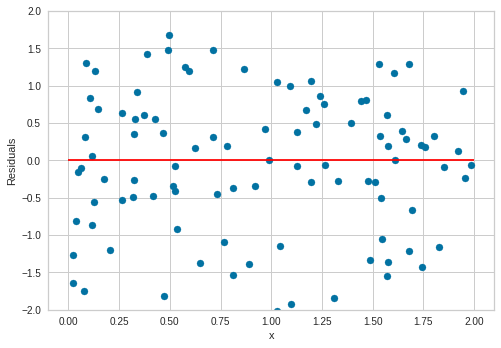

In [ ]:
# getting the residual plot
residplot(y,y_pred,X,np.ones(X.shape))
plt.hlines(y=0,xmin=0,xmax = 2,color ='red')

### Polynomial regression

In [ ]:
# Fitting the data for polynomial regression data
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Dataset
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,390.8])

In [ ]:
print(pd.DataFrame(X).head())

       0
0  258.0
1  270.0
2  294.0
3  320.0
4  342.0


Splitting into training and test set

In [ ]:
# Help page can be opened by adding ? after the function
train_test_split?

In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(10, 1)
(7, 1)
(3, 1)


In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lin_pred = lr.predict(X_test)

In [ ]:
# R2-score 
lr.score(X_test,y_test)

0.25716442445279963

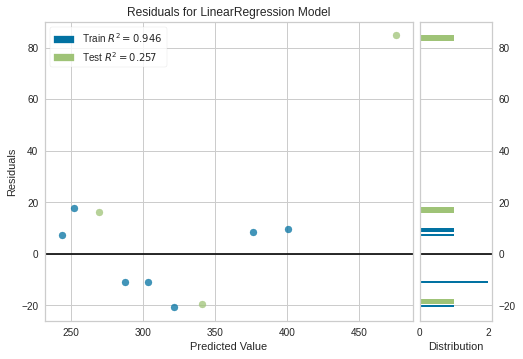

In [ ]:
# Residuals Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr, hist=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

The residual plot analysis could help to understand whether the linear model is appropriate for the given dataset. If the dataset follows linear function, the residuals of the datapoints will be cluttered around y = 0. 

If any patterns are observed in the residual plots, it suggests that the dataset might follow non-linear function

Move on to Polynomial regression

In [ ]:
# Quadratic function
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [ ]:
print(pd.DataFrame(X_train).head())
print(pd.DataFrame(X_train2).head())

       0
0  342.0
1  258.0
2  320.0
3  270.0
4  446.0
     0      1         2
0  1.0  342.0  116964.0
1  1.0  258.0   66564.0
2  1.0  320.0  102400.0
3  1.0  270.0   72900.0
4  1.0  446.0  198916.0


In [ ]:
# Fitting the model
poly_clf = LinearRegression()
poly_clf.fit(X_train2, y_train)
y_pred = poly_clf.predict(X_test2)

In [ ]:
#R2- value
poly_clf.score(X_test2,y_test)

0.9549317214326868

Metrics to assess the models:  
1. $R^{2}$- value  
2. MSE (Mean Squared Error)
3. RMSE (Root Mean Squared Error)

In [ ]:
print('MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y_test, y_lin_pred),
        mean_squared_error(y_test, y_pred)))
print('R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y_test, y_lin_pred),
        r2_score(y_test, y_pred)))

MSE linear: 2608.839, quadratic: 158.280
R^2 linear: 0.257, quadratic: 0.955


MSE and $R^{2}$  
- MSE explains the error between the actual data and the predicted data. Lower the error, better the model  

- $R^{2}$ value represents the explainable variation in the data by the model. Higher the $R^{2}$, better the model 

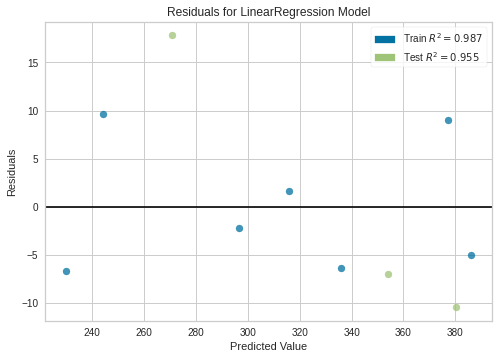

In [ ]:
visualizer = ResidualsPlot(poly_clf, hist=False)
visualizer.fit(X_train2, y_train)
visualizer.score(X_test2, y_test)
visualizer.show()

Text(0.5, 1.0, 'Linear regression')

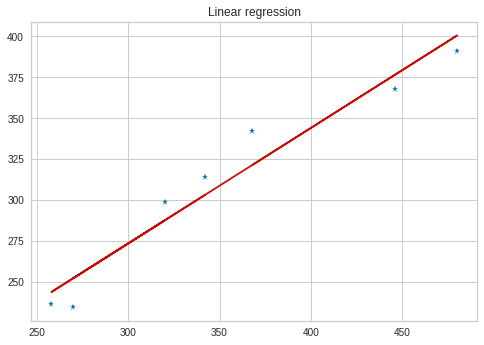

In [ ]:
# Plotting the training and predicted y-values
plt.plot(X_train,y_train,'b*',linestyle='none')
plt.plot(X_train,lr.predict(X_train),'r-')
plt.title('Linear regression')

Text(0.5, 1.0, 'Polynomial regression')

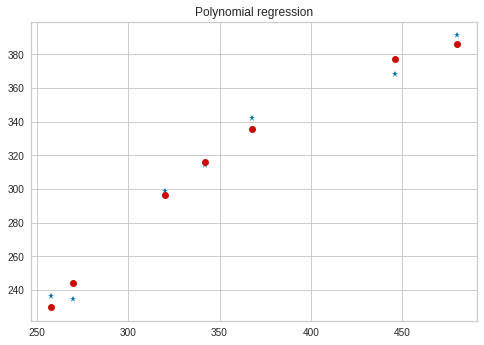

In [ ]:
# Plotting the training and predicted y-values
plt.plot(X_train,y_train,'b*',linestyle='none')
plt.plot(X_train,poly_clf.predict(X_train2),'ro',linestyle='none')
plt.title('Polynomial regression')

### Regularization - Ridge and Lasso

Regularization helps to reduce the overfitting of the model.  

Ridge regularization:
- uses $L_{2}$ (adding penalty to the sum of square of the magnitude of coefficients)  
- Shrink the coefficients so that the coefficients close to zero 
- Useful when the data has collinear features  

Lasso regularization:  
- uses $L_{1}$ (adding penalty to the absolute sum (number) of the coefficients)
- Shrink the coefficient to zero 
- Useful for feature selection and dimensionality reduction

#### Ridge regularization

In [ ]:
# Fitting the data with ridge regularized linear regression model
from sklearn.linear_model import Ridge

# Linear regression
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
y_ridge_fit = ridge.predict(X_test)

# Polynomial regression
ridge_poly = Ridge(alpha = 1)
ridge_poly.fit(X_train2, y_train)
y_ridge_fit = ridge_poly.predict(X_test2)

In [ ]:
print("Scores for Ridge Regularized Linear Regression")
#print("Training set score for : {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used:", np.sum(ridge.coef_ != 0))

print("Scores for Ridge Regularized Polynomial Regression")
#print("Training set score for : {:.2f}".format(ridge_poly.score(X_train2, y_train)))
print("Test set score: {:.2f}".format(ridge_poly.score(X_test2, y_test)))
print("Number of features used:", np.sum(ridge_poly.coef_ != 0))

Scores for Ridge Regularized Linear Regression
Test set score: 0.26
Number of features used: 1
Scores for Ridge Regularized Polynomial Regression
Test set score: 0.96
Number of features used: 2


#### Lasso regularization

In [ ]:
# Lasso analysis for linear regression model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_lasso_fit = lasso.predict(X_test)

In [ ]:
print("Scores for Lasso Regularized Linear Regression")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Scores for Lasso Regularized Linear Regression
Training set score: 0.95
Test set score: 0.26
Number of features used: 1


### Linear Regression analysis using Boston - Housing price dataset


In [ ]:
# Loading the dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)s
boston_df['Price'] = boston.target
boston_df.head()

Pre-processing and data scaling has to be done to understand the dataset and use for the model fitting

In [ ]:
X=boston_df.drop('Price',axis=1)
y=boston_df['Price']

In [ ]:
pd.DataFrame(X).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
#pd.DataFrame(X).info()
pd.DataFrame(X).describe()

To address multi-collinearity in the data, highly correlated features can be removed

In [ ]:
# Look at the collinearity in the data
corr = boston_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Splitting data into training and testing data

In [ ]:
# Split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
print(len(X_test), len(y_test))
print(y_train.shape)
print(y_test.shape)

152 152
(354,)
(152,)


#### Fitting different models

Linear regression model

In [ ]:
# Fitting the data with linear regression model
bos_lr = LinearRegression()
bos_lr.fit(X_train, y_train)
bos_y_lr_pred = bos_lr.predict(X_test)

In [ ]:
#Getting the coefficients of the model
#for i in range(X_train.shape[1]):
 #   print("The coefficient of x{} is {}". format(i,bos_lr.coef_[i]))
#print('The intercept for the model is',format(bos_lr.intercept_))

Ridge regularized model

In [ ]:
# Fitting the data with ridge regularized regression model
bos_rr = Ridge()
bos_rr.fit(X_train, y_train)
bos_y_rr_pred = bos_rr.predict(X_test)

Lasso regularized model

In [ ]:
# Fitting the data with lasso regularized regression model
bos_lasso = Lasso()
bos_lasso.fit(X_train, y_train)
bos_y_lasso_pred = bos_lasso.predict(X_test)

Polynomial regression model

In [ ]:
#Data for polynomial regression
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

# Fitting for polynomial regression
bos_poly = LinearRegression()
bos_poly.fit(X_train2, y_train)
bos_y_poly_pred = bos_poly.predict(X_test2)


Model Selection and Evaluation

In [ ]:
# Training
#print("\n Training set score - Linear: %.2f,\nRidge-regularized: %.2f, \n Lasso-regularized: %.2f, \n Polynomial:%.2f" % (
   # bos_lr.score(X_train, y_train),bos_rr.score(X_train, y_train),
   # bos_lasso.score(X_train, y_train),bos_poly.score(X_train2, y_train)))
#Testing
#print("\nTest set score - Linear: %.2f,\nRidge-regularized: %.2f, \n Lasso-regularized: %.2f, \n Polynomial:%.2f" %(
 #   bos_lr.score(X_test, y_test),bos_rr.score(X_test, y_test),
  #  bos_lasso.score(X_test, y_test),bos_poly.score(X_test2, y_test)))

In [ ]:
import math
print("Different scores")

# MSE value
print('\n RMSE -  Linear: %.3f,\n Ridge-regularized: %.3f, \n Lasso-regularized: %.3f, \n Polynomial:%.3f' % (
        math.sqrt(mean_squared_error(y_test, bos_y_lr_pred)),
        math.sqrt(mean_squared_error(y_test, bos_y_rr_pred)),
        math.sqrt(mean_squared_error(y_test, bos_y_lasso_pred)),
        math.sqrt(mean_squared_error(y_test, bos_y_poly_pred))))

# R2 value
print('\n R^2 -  Linear: %.3f,\n Ridge-regularized: %.3f, \n Lasso-regularized: %.3f, \n Polynomial:%.3f\n' % (
        r2_score(y_test, bos_y_lr_pred),r2_score(y_test, bos_y_rr_pred),
        r2_score(y_test, bos_y_lasso_pred),r2_score(y_test, bos_y_poly_pred)))

# Number of features identified
print("Number of features - Linear:", np.sum(bos_lr.coef_ != 0))
print("Number of features - Ridge-regularized:", np.sum(bos_rr.coef_ != 0))
print("Number of features - Lasso-regularized:", np.sum(bos_lasso.coef_ != 0))
print("Number of features - Polynomial:", np.sum(bos_poly.coef_ != 0))

Different scores

 RMSE -  Linear: 4.639,
 Ridge-regularized: 4.695, 
 Lasso-regularized: 5.064, 
 Polynomial:5.460

 R^2 -  Linear: 0.711,
 Ridge-regularized: 0.704, 
 Lasso-regularized: 0.656, 
 Polynomial:0.600

Number of features - Linear: 13
Number of features - Ridge-regularized: 13
Number of features - Lasso-regularized: 10
Number of features - Polynomial: 105


### Model evaluation for Boston dataset

#### Cross-validation 

In [ ]:
from sklearn.model_selection import cross_val_score
#cross_val_score?

In [ ]:
cv_lr_bos = np.mean(cross_val_score(bos_lr,
                                    X_train, y_train, cv=5))
cv_lr_bos

0.6879825316957133

In [ ]:
# 5-fold cross-validation on the training test
cv_lr_bos = np.mean(cross_val_score(bos_lr,
                                    X_train, y_train, cv=5))
cv_rr_bos = np.mean(cross_val_score(bos_rr,
                                    X_train, y_train, cv=5))
cv_lasso_bos = np.mean(cross_val_score(bos_lasso,
                                    X_train, y_train, cv=5))
cv_poly_bos = np.mean(cross_val_score(bos_poly,
                                    X_train2, y_train, cv=5))

In [ ]:
# Cross-validation score
print("Cross-validation score - Linear: %.3f, \n Ridge-regularized: %.3f, \n Lasso-regularized: %.3f, \n Polynomial:%.3f" %(
    cv_lr_bos,cv_rr_bos,cv_lasso_bos,cv_poly_bos))

Cross-validation score - Linear: 0.688, 
 Ridge-regularized: 0.685, 
 Lasso-regularized: 0.648, 
 Polynomial:0.578
